In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2
%cd ../../src

from torchvision import models
from matplotlib import pyplot as plt
import numpy as np
import torch

from vinsight.visualization import PixelActivationOpt, NeuronSelector, ChannelSplit, SpatialSplit
from vinsight.visualization import NeuronSplit, BlurResizeStep, BlurTransformStep

if torch.cuda.is_available and torch.cuda.device_count() > 0:
    torch.set_default_tensor_type("torch.cuda.FloatTensor")

/home/fabian/Projects/interpretability-framework/src


In [2]:
alexnet = models.alexnet(pretrained=True)

# Channel-wise
## No regularization

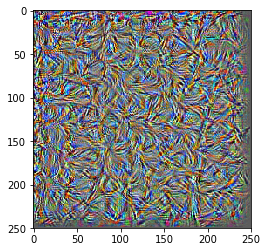

In [11]:
res = PixelActivationOpt(
    alexnet.features[:9],
    NeuronSelector(ChannelSplit(), [1]),
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

## Blur Regularization

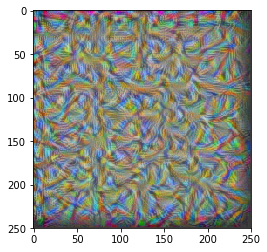

In [3]:
res = PixelActivationOpt(
    alexnet.features[:9],
    NeuronSelector(ChannelSplit(), [1]),
    iter_transform = BlurTransformStep(),
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

## Resizing regularization

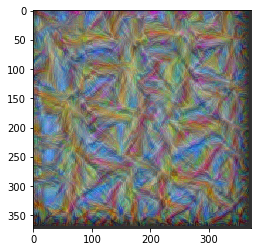

In [10]:
res = PixelActivationOpt(
    alexnet.features[:9],
    NeuronSelector(ChannelSplit(), [1]),
    iter_transform = BlurResizeStep(),
    init_size=50
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

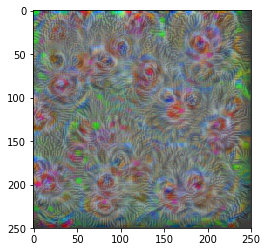

In [4]:
res = PixelActivationOpt(
    alexnet.features[:11],
    NeuronSelector(ChannelSplit(), [0]),
    iter_transform = BlurTransformStep(),
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

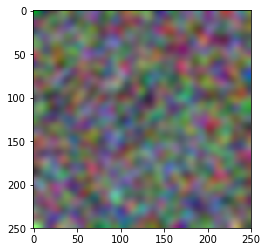

In [5]:
res = PixelActivationOpt(
    alexnet.features[:13],
    NeuronSelector(ChannelSplit(), [0]),
    iter_transform = BlurTransformStep(),
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

# Spatially

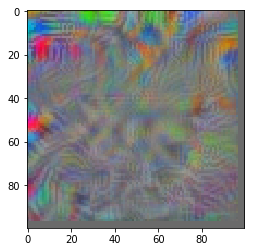

In [6]:
res = PixelActivationOpt(
    alexnet.features[:11],
    NeuronSelector(SpatialSplit(), [3, 3]),
    iter_transform = BlurTransformStep(),
    init_size=100,
    steps_per_iter=100
).visualize().numpy()

res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

# Individual Neurons

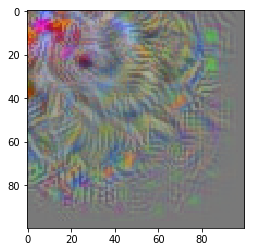

In [7]:
res = PixelActivationOpt(
    alexnet.features[:11],
    NeuronSelector(NeuronSplit(), [0, 0, 0]),
    init_size=100,
    steps_per_iter=100,
    iter_transform = BlurTransformStep(),
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

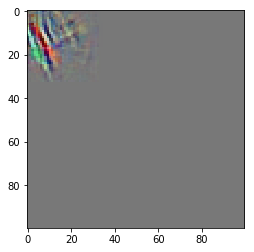

In [8]:
res = PixelActivationOpt(
    alexnet.features[:4],
    NeuronSelector(NeuronSplit(), [1, 0, 0]),
    iter_transform = BlurTransformStep(),
    init_size=100,
    steps_per_iter=10,
    lr=1
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()

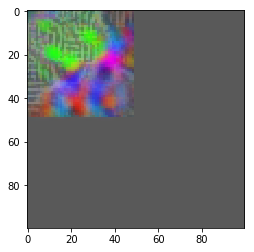

In [9]:
res = PixelActivationOpt(
    alexnet.features[:6],
    NeuronSelector(NeuronSplit(), [5, 0, 0]),
    iter_transform = BlurTransformStep(),
    init_size=100,
    steps_per_iter=30
).visualize().numpy()
res = res - res.min()
res = res / res.max()
plt.imshow(res)
plt.show()